# Introdução

Nesse notebook vamos aprender como criar gráficos de pizza ou de rosca usando o pandas e o matplotlib. Abandone definitivamente o excel e vamos mergulhar nessa ferramenta de visualização incrível.

Para esse tutorial irei utilizar o dataset "dados escolares" que é na verdade o resultado do censo do IBGE para um município em específico. Portanto, vamos importar de dentro da pasta "data" o xlsx chamado "dados_escolares". A seguir vamos chamar o comando dates.head() para mostrar as primeiras 5 linhas do nosso dataset.

In [17]:
import pandas as pd

tbl = pd.read_excel("data/dados_escolares.xlsx")
tbl["MUNICÍPIO"] = pd.to_numeric(tbl["MUNICÍPIO"]) 
tbl.head()

,EDUCAÇÃO,FONTE,DATA,MUNICÍPIO,REGIÃO,ESTADO
0,Matrículas na Educação Básica (alunos),MEC/INEP,2020,1181.0,38116,2554321.0
1,Matrículas na Creche (alunos),MEC/INEP,2020,105.0,3729,223944.0
2,Matrículas na Pré-escola (alunos),MEC/INEP,2020,147.0,4223,276344.0
3,Matrículas no Ensino Fundamental (alunos),MEC/INEP,2020,612.0,19888,1407978.0
4,Matrículas no Ensino Médio (alunos),MEC/INEP,2020,285.0,6979,425477.0


## Criando nosso primeiro gráfico de pizza

Agora vamos criar nosso primeiro gráfico de pizza simples utilizando algumas opções básicas do matplotlib. Mas antes, vamos importar a biblioteca usando o comando de importação.

In [4]:
import matplotlib.pyplot as plt

Aqui vamos usar a coluna "educação" como rótulos e também a coluna município para plotar nosso gráfico.

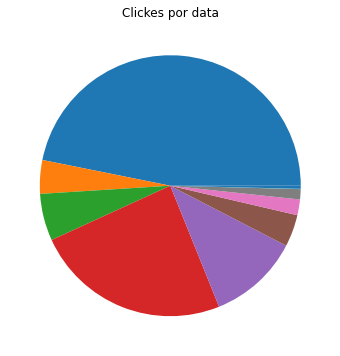

In [42]:
plt.figure(figsize=(10,6))
plt.pie(tbl["MUNICÍPIO"])
plt.title("Clickes por data")
plt.show()

Agora que nosso primeiro gráfico de pizza está pronto, podemos perceber que existem alguns problemas. O primeiro deles é que não existe uma legenda! Vamos arrumar isso

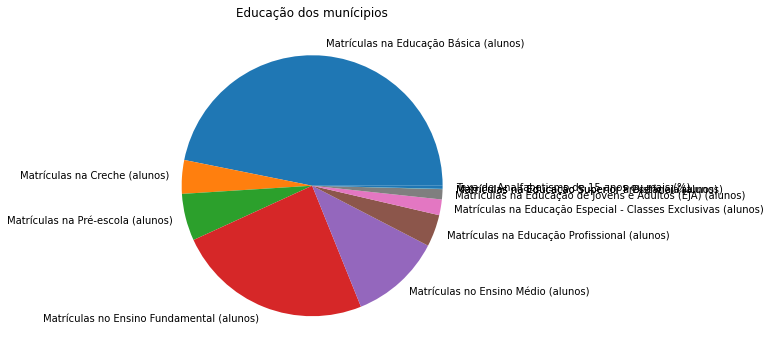

In [94]:
plt.figure(figsize=(10,6))
plt.pie(tbl["MUNICÍPIO"], labels=tbl['EDUCAÇÃO'])
plt.title("Educação dos munícipios")
plt.show()


Certo, funciona, mas não tão bem assim... vamos melhorar essa legenda...

O problema é que informamos a nossa legenda no próprio gráfico, isso faz com que a legenda seja exibida dessa forma. Isso é conveniente quando nossos labels são pequenos e também não temos cores tão próximas umas das outras. Sendo assim, a melhor forma para arrumar isso seria adicionar uma legenda em forma de lista.

Para isso, você deve criar o que chamamos de subplots. Nesses subplots temos fig1 e ax1, cada um deles carregam atributos diferentes para nosso gráfico. Assim teremos um gráfico mais ou menos assim:

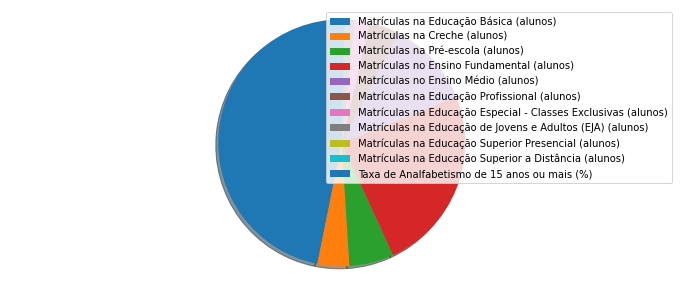

In [97]:
labels = tbl["EDUCAÇÃO"]
sizes = tbl["MUNICÍPIO"]
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(sizes, shadow=True, startangle=90, )
ax1.axis('equal')  
ax1.legend(labels) 
plt.show()

Ficou melhor, mas podemos perceber que a legenda está em cima dos dados, dificultando a visualização. Para resolver esse problema vamos adicionar os comandos de bbox_to_anchor, loc e bbox_transform. 

De uma forma bastante grosseira, esses comandos utilizam as coordenadas da figura como referência para posicionar as legendas. Portanto ao adicionar esse comando geralmente é necessário alguns ajustes.

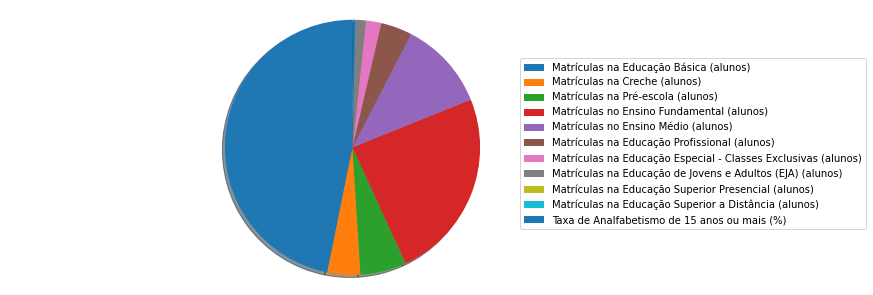

In [129]:
labels = tbl["EDUCAÇÃO"]
sizes = tbl["MUNICÍPIO"]
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(sizes, shadow=True, startangle=90, )
ax1.axis('equal')  
# adicionando o bbox_to_anchor e transform
ax1.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure) 
# fazendo alguns ajustes para a legenda ficar TOP
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8)
plt.show()

Um outro problema que percebemos logo de cara é que não existem títulos para nada. Certo, tudo isso faz parte da legibilidade de um gráfico, sendo assim, vamos dar uma melhorada começando pelo título do gráfico. Para isso vamos executar o seguinte comando:

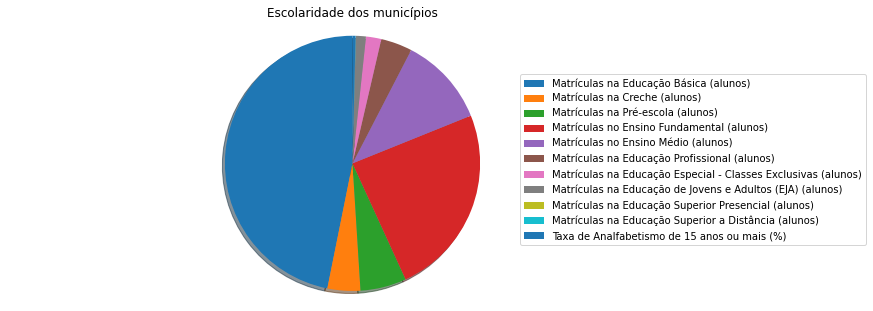

In [138]:
labels = tbl["EDUCAÇÃO"]
sizes = tbl["MUNICÍPIO"]
fig1, ax1 = plt.subplots(figsize=(12,5))
plt.title("Escolaridade dos municípios")
ax1.pie(sizes, shadow=True, startangle=90, )
ax1.axis('equal')  
# adicionando o bbox_to_anchor e transform
ax1.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure) 
# fazendo alguns ajustes para a legenda ficar TOP
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8)
plt.show()

Um recurso interessante para destacar uma parte da nossa pizza é fazer o "explode" que é separar um pedaço da pizza. Para isso faça algo assim:

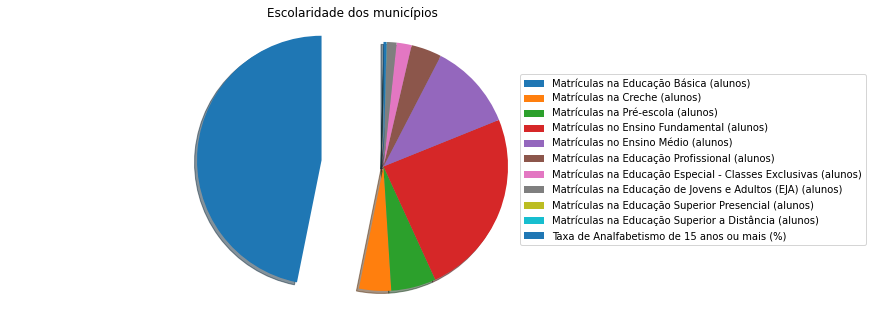

In [139]:
labels = tbl["EDUCAÇÃO"]
sizes = tbl["MUNICÍPIO"]
explode = (0.5,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,5))
plt.title("Escolaridade dos municípios")
#adicionando o explode
ax1.pie(sizes, explode=explode, shadow=True, startangle=90, )
ax1.axis('equal')  

# adicionando o bbox_to_anchor e transform
ax1.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure) 
# fazendo alguns ajustes para a legenda ficar TOP
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8)
plt.show()

# Gráfico de rosca

Teóricamente o gráfico de rosca é muito parecido com nosso amigo gráfico de pizza. Para isso vamos alterar alguns parâmetros do nosso gráfico...

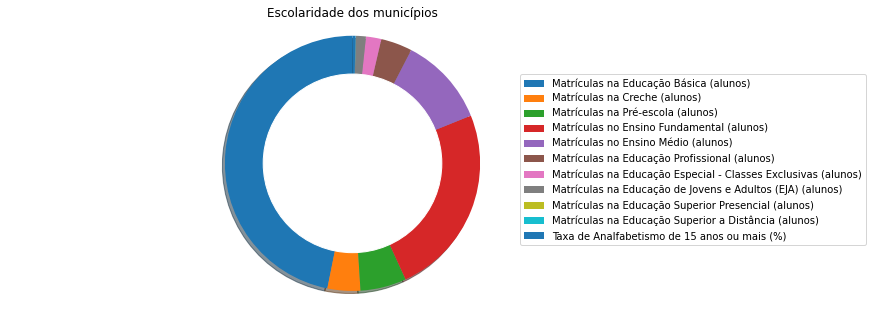

In [146]:
labels = tbl["EDUCAÇÃO"]
sizes = tbl["MUNICÍPIO"]
fig1, ax1 = plt.subplots(figsize=(12,5))

plt.title("Escolaridade dos municípios")
ax1.pie(sizes, shadow=True, startangle=90)
ax1.axis('equal')  

# adicionando o bbox_to_anchor e transform
ax1.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure) 

# fazendo alguns ajustes para a legenda ficar TOP
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8)

# Aqui podemos adicionar um circulo no centro do nosso gráfico
circulo_central = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circulo_central)

plt.show()